In [2]:
import numpy as np
import math as mt
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress as lr
from PIL import Image
from typing import List
import rasterio
from scipy.ndimage import zoom

In [53]:
def box_count(raster: np.ndarray, box_size: int):
    mask = ~(raster == -9999)
    # print(mask)
    rows, cols = raster.shape
    total_box_count = 0 
    box_count_for_size = 0
    for i in range(0, rows, box_size):
        for j in range(0, cols, box_size):
            end_row = min(i + box_size, rows)
            end_col = min(j + box_size, cols)
            # print(f"For location {i}, {j}, end row is {end_row} and end col is {end_col}")
            current_slice = raster[i:end_row, j:end_col]
            current_mask = mask[i:end_row, j:end_col]

            valid_vals = current_slice[current_mask]
            if valid_vals.size > 0:
                max_val = np.max(valid_vals)
                min_val = np.min(valid_vals)
                # print(f"max_val = {max_val}, min_val={min_val}")
                hdiff = max_val - min_val # if box_size = 1 - hdiff = 0 // Times 2 to account for 2m by 2m by 1m scale
                box_count = mt.ceil(hdiff / (2*box_size))
                box_count_for_size += box_count
                total_box_count += box_count
        # print(f"Total box count for box size {size} is {box_count_for_size}")
    return total_box_count

In [50]:
def fractal_dimension(tif_file: str, box_sizes: List[int]):
    with rasterio.open(tif_file) as src:
        image = src.read(1)
    raster = np.array(image)
    # raster = ~raster
    print("File shape:", raster.shape)
    plt.imshow(raster, cmap="gray_r")
    plt.title(f"Z-Slice {raster.shape[0]} of Menger Sponge")
    plt.axis("off")
    plt.show()

    counts = []
    b_size = []

    for size in box_sizes:
        b_size.append(size)
        count = box_count(raster=raster, box_size=size)
        print("count", count)
        counts.append(count) 
    
    log_eps = np.log(1 / np.array(box_sizes))
    log_counts = np.log(counts)

    slope, intercept, *_ = lr(log_eps, log_counts)

    plt.figure(figsize=(8, 6))
    plt.plot(log_eps, log_counts, 'o', label='Log-Log Data')
    plt.plot(log_eps, slope * log_eps + intercept, 'r', label=f'Fit: slope = {slope:.4f}')
    plt.xlabel('log(1/ε)')
    plt.ylabel('log(N(ε))')
    plt.title('Fractal Dimension Estimation')
    plt.legend()
    plt.grid(True)
    plt.show()

    return slope
    

File shape: (900, 900)


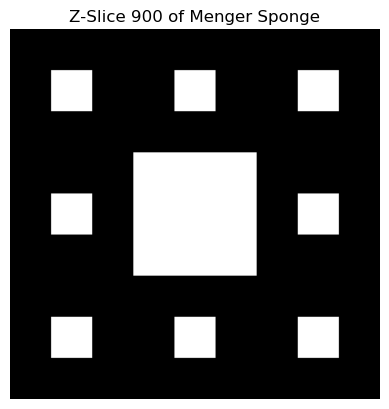

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
count 0
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
count 0
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
count 0
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True

C:\Users\Hasan\AppData\Local\Temp\ipykernel_38032\1239653122.py:22: RuntimeWarning: divide by zero encountered in log
  log_counts = np.log(counts)


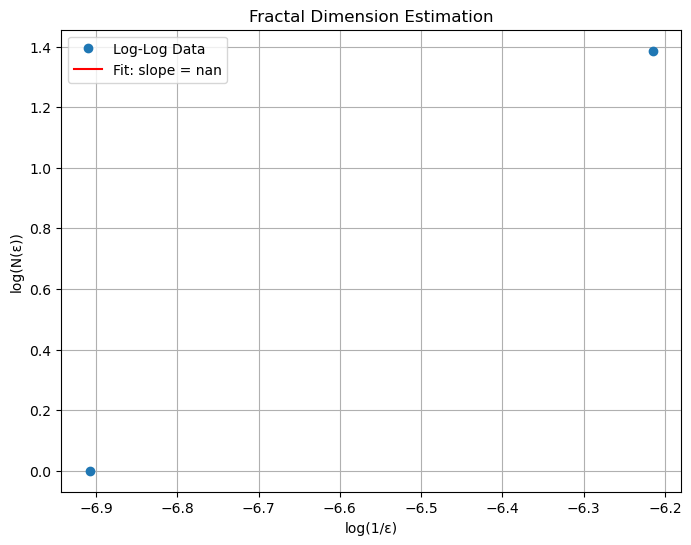

np.float64(nan)

In [51]:
list_of_box_sizes = [10, 20, 100, 500, 1000]
path = 'datasets/temp/SETSM_s2s041_WV02_20240505_10300100FA6CA900_10300100FAAD4400_2m_seg5_dem.tif'
fractal_dimension(tif_file=sponge_path, box_sizes=list_of_box_sizes)

In [ ]:
def fractal_dimension_rescaled(tif_file: str, box_sizes: List[int]):
    with rasterio.open(tif_file) as src:
        image = src.read(1)
    raster = np.array(image)
    scaled = zoom(raster, zoom=2, order=1)
    counts = []
    b_size = []

    for size in box_sizes:
        b_size.append(size)
        count = box_count(raster=scaled, box_size=size)
        counts.append(count) 
    
    log_eps = np.log(1 / np.array(box_sizes))
    log_counts = np.log(counts)

    slope, intercept, *_ = lr(log_eps, log_counts)

    plt.figure(figsize=(8, 6))
    plt.plot(log_eps, log_counts, 'o', label='Log-Log Data')
    plt.plot(log_eps, slope * log_eps + intercept, 'r', label=f'Fit: slope = {slope:.4f}')
    plt.xlabel('log(1/ε)')
    plt.ylabel('log(N(ε))')
    plt.title('Fractal Dimension Estimation')
    plt.legend()
    plt.grid(True)
    plt.show()

    return slope


In [39]:
list_of_box_sizes = [2, 10, 100]
path = 'datasets/temp/SETSM_s2s041_WV02_20240505_10300100FA6CA900_10300100FAAD4400_2m_seg5_dem.tif'
fractal_dimension_rescaled(tif_file=path, box_sizes=list_of_box_sizes)

RasterioIOError: datasets/temp/SETSM_s2s041_WV02_20240505_10300100FA6CA900_10300100FAAD4400_2m_seg5_dem.tif: No such file or directory

File shape: (900, 900)


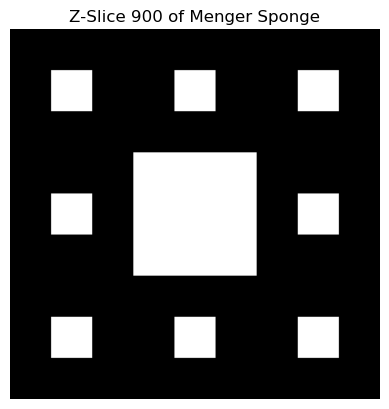

C:\Users\Hasan\AppData\Local\Temp\ipykernel_38032\2072430913.py:21: RuntimeWarning: divide by zero encountered in log
  log_counts = np.log(counts)
c:\Users\Hasan\miniconda3\envs\rasterenv\Lib\site-packages\numpy\lib\_function_base_impl.py:2767: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


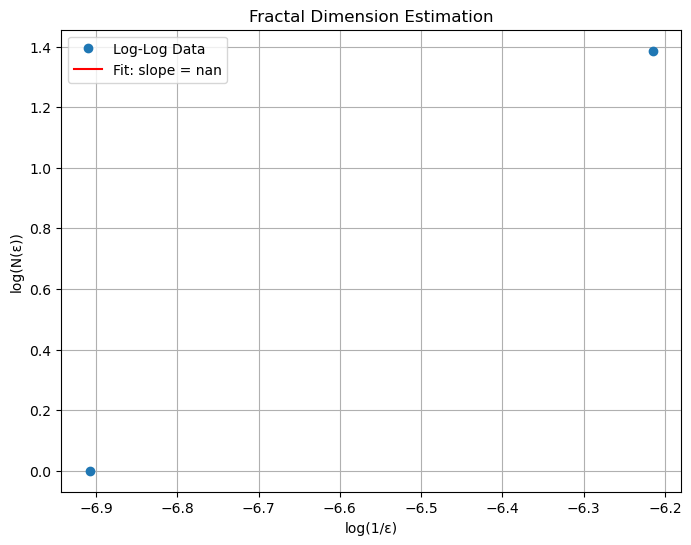

np.float64(nan)

In [45]:
list_of_box_sizes = [10, 20, 100, 500, 1000]

sponge_path = "../data/Sierpinski carpet.tif"

fractal_dimension(sponge_path, list_of_box_sizes)

In [44]:
test_file = "../data/Sierpinski carpet.tif"

with rasterio.open(test_file) as dataset:
    band1 = dataset.read(1)
    print(band1[0,100])

1


File shape: (1000, 600)


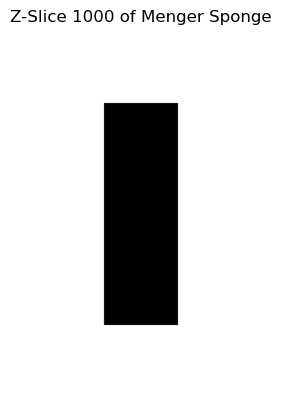

count 4806
count 1330
count 920
count 528
count 432
count 402
count 212
count 144
count 56
count 54
count 43
count 46
count 42
count 34
count 32
count 30


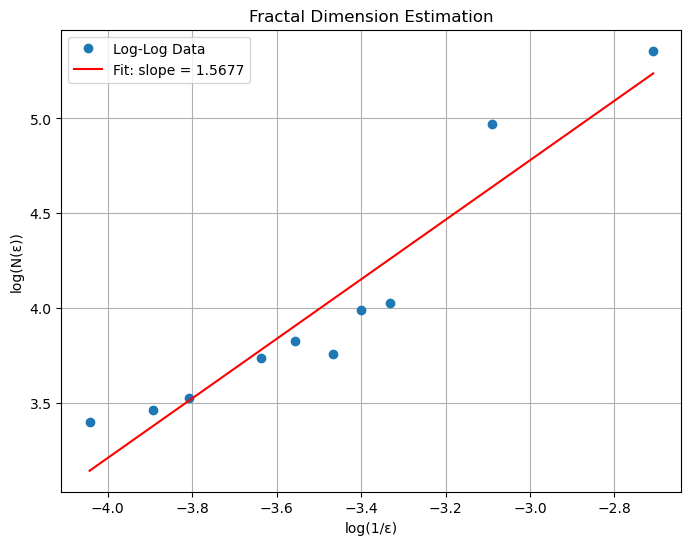

np.float64(1.5676709712135724)

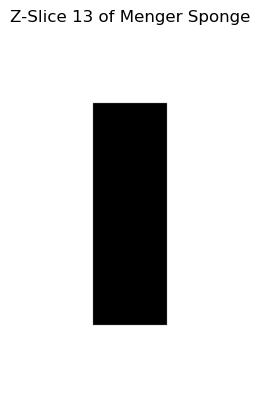

: 

In [ ]:
plt.imshow(plane, cmap="gray_r")
plt.title(f"Z-Slice {13} of Menger Sponge")
plt.axis("off")
plt.show()

In [124]:
def best_fit(log_eps, log_counts):
    startSlope, *_ = lr(log_eps, log_counts)
    size = np.size(log_eps)
    minimum_size = 3
    while(size >= minimum_size):
        newSlope, *_ = lr(log_eps[1:], log_counts[1:])
        if(newSlope >= startSlope):
            print("removed value...", log_counts[0])
            log_eps = log_eps[1:]
            log_counts = log_counts[1:]
            size -= 1
        else:
            break

    startSlope = newSlope
    
    while(size >= minimum_size):
        newSlope, *_ = lr(log_eps[:-1], log_counts[:-1])
        if(newSlope >= startSlope):
            print("removed value...", log_counts[-1])
            log_eps = log_eps[:-1]
            log_counts = log_counts[:-1]
            size -= 1
        else:
            break
    
    print("best slope:", newSlope)
    return log_eps, log_counts

def fractal_dimension_raster(raster, box_sizes: List[int]):
    # raster = ~raster
    print("File shape:", raster.shape)
    plt.imshow(raster, cmap="gray_r")
    plt.title(f"Z-Slice {raster.shape[0]} of Menger Sponge")
    plt.axis("off")
    plt.show()

    counts = []
    b_size = []

    for size in box_sizes:
        b_size.append(size)
        count = box_count(raster=raster, box_size=size)
        print("count", count)
        counts.append(count) 
    
    log_eps = np.log(1 / np.array(box_sizes))
    log_counts = np.log(counts)
    log_eps, log_counts = best_fit(log_eps, log_counts)
    slope, intercept, *_ = lr(log_eps, log_counts)

    plt.figure(figsize=(8, 6))
    plt.plot(log_eps, log_counts, 'o', label='Log-Log Data')
    plt.plot(log_eps, slope * log_eps + intercept, 'r', label=f'Fit: slope = {slope:.4f}')
    plt.xlabel('log(1/ε)')
    plt.ylabel('log(N(ε))')
    plt.title('Fractal Dimension Estimation')
    plt.legend()
    plt.grid(True)
    plt.show()

    return slope

File shape: (1000, 600)


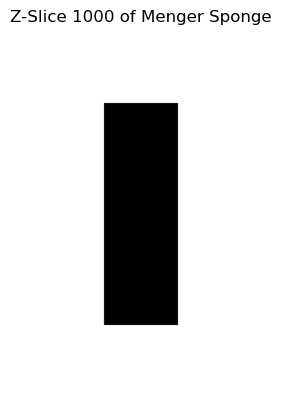

count 4806
count 1330
count 920
count 528
count 432
count 402
count 212
count 144
count 56
count 54
count 43
count 46
count 42
count 34
count 32
count 30
removed value... 3.4011973816621555
removed value... 3.4657359027997265
removed value... 3.5263605246161616
removed value... 3.7376696182833684
removed value... 3.828641396489095
removed value... 3.7612001156935624
removed value... 3.9889840465642745
removed value... 4.02535169073515
removed value... 4.969813299576001
removed value... 5.356586274672012
removed value... 5.996452088619021
removed value... 6.068425588244111
removed value... 6.269096283706261
removed value... 6.824373670043086
best slope: 1.8534104027413145


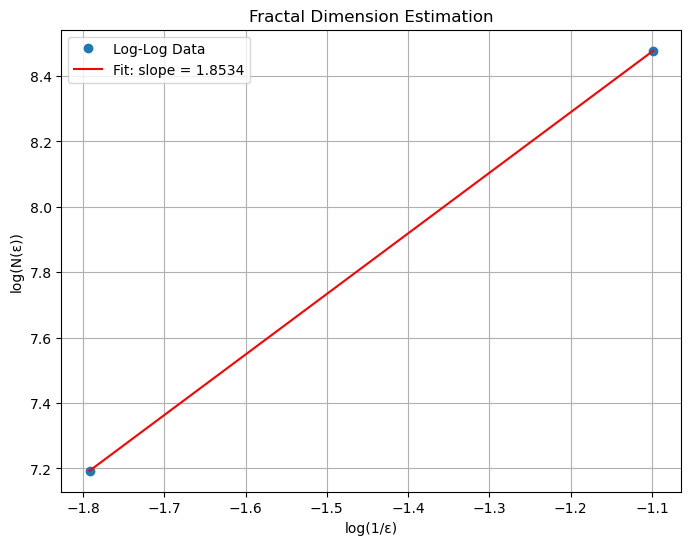

np.float64(1.8534104027413145)

In [125]:
plane = np.full((1000, 600), 250.0, np.float32)
plane[200:800, 200:400] = 300.0
# box_count(plane, 15)
fractal_dimension_raster(plane, [3, 6, 7, 9, 11, 12, 15, 22, 28, 30, 32, 35, 38, 45, 49, 57])

: 